# **STANDARD NOTEBOOK TO GET RESULTS**

In [1]:
import pandas as pd 

import os 
import sys 

module_path = os.path.abspath(os.path.join(os.getcwd(), '../Main_modules'))
sys.path.append(module_path)

import warnings 
import process 
from PyFolioC_classes import PyFolioC
warnings.filterwarnings("ignore") ## so that there are no polluting warnings as output of this cell


## 1. Clean the Data

In [2]:
# Jerome path : r'C:\Users\33640\OneDrive\Documents\GitHub\Portfolio_clustering_project\Data\DataBase.csv'
# Nail path : '/Users/khelifanail/Documents/GitHub/Portfolio_clustering_project/Data/DataBase.csv'
df = pd.read_csv('/Users/khelifanail/Documents/GitHub/Portfolio_clustering_project/Data/DataBase.csv')

df.set_index('ticker', inplace=True)

df.columns = pd.to_datetime(df.columns.str[1:], format='%Y%m%d').strftime('%d/%m/%Y')

df_cleaned = df.dropna() # Utilisez la méthode fillna(0) pour remplacer les NaN par 0

df_cleaned = df_cleaned.transpose() ## WE WANT COLUMNS TO BE VECTOR OF RETURN FOR A GIVEN TICKER

df_cleaned.iloc[5025,:]

ticker
AA     0.006530
ABM   -0.010814
ABT    0.004153
ADI    0.000168
ADM    0.008015
         ...   
XLY    0.003114
XOM    0.010951
XRX    0.002444
YUM    0.000596
ZTR    0.000000
Name: 31/12/2019, Length: 663, dtype: float64

## 2. Run the code

Once the run is completed, you have: 
* the overall return -> overall return
* the PnL associated to the strategy
* the daily PnL associated to the strategy
* the Sharpe Ratio associated to the strategy

In [3]:
##################################################################### PARAMETERS #####################################################################
historical_data = df_cleaned
number_of_repetitions = 10
lookback_window = [3190,3265]  ## new lookback_window
evaluation_window = 5
number_of_clusters = 24
cov_method = 'SPONGE'
sigma = 0.01 ## on a fait bouger sigma ici
eta = 0.01
markowitz_type = 'expected_returns'
beta = 0.9
K = 4  # Number of fold for the cross validation
tc=0.0001

##################################################################### PORTFOLIO ######################################################################
portfolio = PyFolioC(number_of_repetitions=number_of_repetitions, historical_data=historical_data, lookback_window=lookback_window, evaluation_window=evaluation_window, number_of_clusters=number_of_clusters, sigma=sigma, eta=eta, EWA_cov=True, beta=beta, short_selling=True, cov_method=cov_method, markowitz_type=markowitz_type, transaction_cost_rate=tc)
## year 2008-2009 ==> 2007:2262 if evaluation_window == 2
## year 2008-2009 ==> 2007:2265 if evaluation_window == 5
## year 2012-2013 ==> 3016:3265
## year 2018-2019 ==> 4524:4774
## year 2016-2019 ==> 4021:4774
## year 2010-2020 ==> 2512:5279 (we go until 5277 to have a multiple of 5 for the difference)
######### year 2013-2019 ==> 3265:5025 352 window of 5

In [4]:
overall_return, PnL, portfolio_value, daily_PnL, Turnovers, most_corr_contribution = portfolio.sliding_window_past_indep(352,include_transaction_costs=True)

Error occurred at step 1: cannot access local variable 'overall_return' where it is not associated with a value


ValueError: not enough values to unpack (expected 6, got 4)

In [3]:
df_PnL = pd.DataFrame(PnL, columns=['PnL'])


df_PnL.to_csv(f'PnL_SPONGE-Short-cov_75-5-0.01_clusters=24_EWA.csv', index=False)

In [32]:
import warnings 
from PyFolioC import PyFolio
warnings.filterwarnings("ignore") ## so that there are no polluting warnings as output of this cell

##################################################################### PARAMETERS #####################################################################
historical_data = df_cleaned
number_of_repetitions = 10
lookback_window = [3190,3265]  ## new lookback_window
evaluation_window = 5
number_of_clusters = 17
cov_method = 'signed_laplacian'
sigma = 0.01 ## on a fait bouger sigma ici
eta = 0
markowitz_type = 'expected_returns'
beta = 0.999
K = 4  # Number of fold for the cross validation
tc=0.0001
for cov_method in ['SPONGE_sym', 'signed_laplacian']:
    ##################################################################### PORTFOLIO ######################################################################
    portfolio = PyFolioC(number_of_repetitions=number_of_repetitions, historical_data=historical_data, lookback_window=lookback_window, evaluation_window=evaluation_window, number_of_clusters=number_of_clusters, sigma=sigma, eta=eta, EWA_cov=False, beta=beta, short_selling=True, cov_method=cov_method, markowitz_type=markowitz_type, transaction_cost_rate=tc)
    overall_return, PnL, portfolio_value, daily_PnL, Turnovers= portfolio.sliding_window_past_indep(352,include_transaction_costs=True)
    df_PnL = pd.DataFrame(PnL, columns=['PnL'])
    df_PnL.to_csv(f'PnL_{cov_method}-Short-cov_75-5-0.csv', index=False)

step 1/352, portfolio value: 1.0201
step 2/352, portfolio value: 1.0226
step 3/352, portfolio value: 1.0400
step 4/352, portfolio value: 1.0411
step 5/352, portfolio value: 1.0434
step 6/352, portfolio value: 1.0483
step 7/352, portfolio value: 1.0603
step 8/352, portfolio value: 1.0611
step 9/352, portfolio value: 1.0675
step 10/352, portfolio value: 1.0688
step 11/352, portfolio value: 1.0786
step 12/352, portfolio value: 1.0895
step 13/352, portfolio value: 1.0951
step 14/352, portfolio value: 1.1135
step 15/352, portfolio value: 1.1159
step 16/352, portfolio value: 1.1208
step 17/352, portfolio value: 1.1240
step 18/352, portfolio value: 1.1243
step 19/352, portfolio value: 1.1269
step 20/352, portfolio value: 1.1209
step 21/352, portfolio value: 1.0891
step 22/352, portfolio value: 1.0964
step 23/352, portfolio value: 1.1018
step 24/352, portfolio value: 1.0694
step 25/352, portfolio value: 1.0977
step 26/352, portfolio value: 1.0979
step 27/352, portfolio value: 1.1029
step 28/35

Correlation level and estimation of future returns

0.11335000485883384


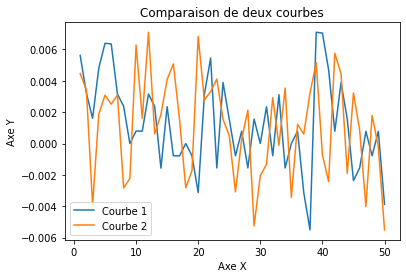

In [3]:
lookback_window = [4265,4265]
L1=[]
L2=[]
for j in range(663):
    L1.append([])
    L2.append([])
    for i in range(50):
        L1[j].append(df_cleaned.iloc[3265+i,j])
        L2[j].append(df_cleaned.iloc[3215+i:3265+i,j].mean())

import numpy as np

Corels=[]
for j in range (663):
    asset_returns = np.array(L1[j])
    Corel=0
    for i in range(50):
        # Initialisation du DataFrame pour stocker les rendements bruités
        noised_returns = asset_returns.copy()
        noise_std_dev = 0.1
        # Génération du bruit
        noise=[]
        for i in range(50):
            noise.append( np.random.normal(0, noise_std_dev))
        # Ajout du bruit aux rendements de l'actif
        noised_returns = asset_returns + noise
        noised_returns
        # Calculer min et max de x et y
        x_min, x_max = asset_returns.min(), asset_returns.max()
        y_min, y_max = noised_returns.min(), noised_returns.max()
        rescale=max(np.abs(y_min), y_max)
        # Mise à l'échelle de y pour qu'elle corresponde à l'échelle de x
        y_scaled = (noised_returns- y_min) * (x_max - x_min) / (y_max - y_min) + x_min

        correlation_matrix = np.corrcoef(asset_returns, y_scaled)
        Corel+=correlation_matrix[0, 1]/50
    Corels.append(Corel)
print(np.array(Corels).mean())

import matplotlib.pyplot as plt

# Données pour la première courbe
x1 = [i for i in range(1, 51)]
y1= asset_returns

# Données pour la deuxième courbe
y2 = y_scaled

# Création du graphique
plt.figure()

# Ajout des courbes au graphique
plt.plot(x1, y1, label='Real returns')
plt.plot(x1, y2, label='Noised returns')

# Ajout d'un titre et des labels pour les axes
plt.title('Comparison of noised returns and real returns for a 1% correlation level')
plt.xlabel('Trading days')
plt.ylabel('Daily returns')

# Ajout d'une légende
plt.legend()

# Affichage du graphique
plt.show()


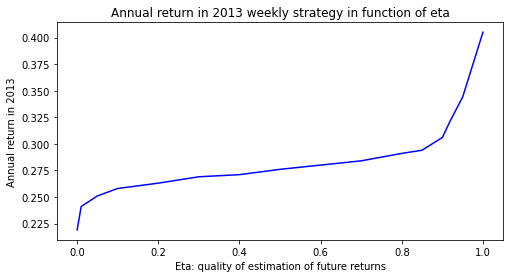

In [9]:
import matplotlib.pyplot as plt
import numpy as np

# Génération de données pour les deux courbes
x = np.array([0, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.7, 0.8, 0.85, 0.9, 0.92, 0.95, 1])
y1 = np.array([0.219, 0.241, 0.251, 0.258, 0.263, 0.269, 0.271, 0.276, 0.284, 0.291, 0.294, 0.306, 0.322, 0.344, 0.405])
y2=np.array([20.6, ])

# Création du graphique
plt.figure(figsize=(8, 4))  # Taille du graphique

# Tracé de la première courbe
plt.plot(x, y1, color='blue')  # Courbe sin(x) en bleu



# Ajout de titres et de légendes
plt.title('Annual return in 2013 weekly strategy in function of eta')  # Titre du graphique
plt.xlabel('Eta: quality of estimation of future returns')  # Étiquette de l'axe des abscisses
plt.ylabel('Annual return in 2013')



# Affichage du graphique
plt.show()

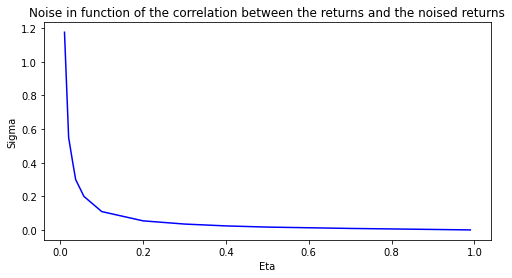

In [35]:
import matplotlib.pyplot as plt
import numpy as np

# Génération de données pour les deux courbes
x = np.array([ 0.01, 0.02, 0.1, 0.3, 0.5, 0.7, 0.9, 1])
y1 = np.array([0.269, 0.272, 0., 0., 0., 0.218, 0.22, 0.222])


# Création du graphique
plt.figure(figsize=(8, 4))  # Taille du graphique

# Tracé de la première courbe
plt.plot(x, y1, color='blue')  # Courbe sin(x) en bleu



# Ajout de titres et de légendes
plt.title('Noise in function of the correlation between the returns and the noised returns')  # Titre du graphique
plt.xlabel('Eta')  # Étiquette de l'axe des abscisses
plt.ylabel('Sigma')



# Affichage du graphique
plt.show()

Transaction cost

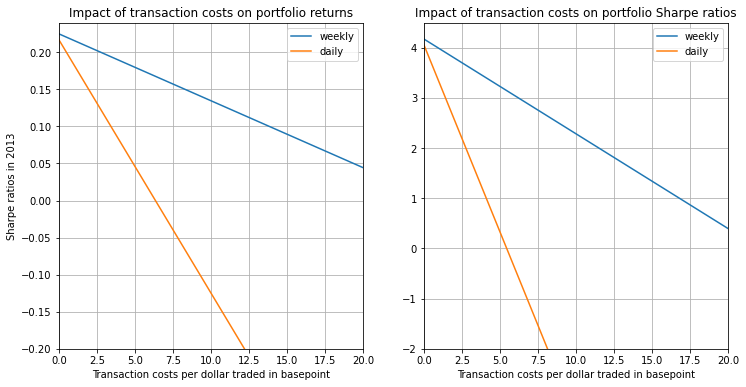

In [69]:
import numpy as np
import matplotlib.pyplot as plt

def plot_two_lines(points1, points2, ax, labels):
    """ Fonction pour calculer et tracer deux droites à partir de points donnés sur un axe. """
    # Calcul et tracé pour chaque paire de points
    for points, label in zip([points1, points2], labels):
        p1, p2 = points
        m = (p2[1] - p1[1]) / (p2[0] - p1[0])  # Calcul de la pente
        b = p1[1] - m * p1[0]                # Calcul de l'ordonnée à l'origine
        x_values = np.linspace(0, 30, 100)  # Valeurs x sur l'intervalle souhaité
        y_values = m * x_values + b          # Valeurs y correspondantes
        ax.plot(x_values, y_values, label=label)          # Tracer la droite
    ax.legend()

# Créer la figure et les axes pour les deux graphiques
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
labels=['weekly', 'daily']

# Données pour le premier graphique
points_graph1_droite1 = [(0, 0.224913002325013), (1, 0.21588269119)]
points_graph1_droite2 = [(0, 0.2170871111), (1, 0.1828922402)]
plot_two_lines(points_graph1_droite1, points_graph1_droite2, ax1, labels)
ax1.set_title('Impact of transaction costs on portfolio returns')
ax1.set_xlabel('Transaction costs per dollar traded in basepoint')
ax1.set_ylabel('Annual return in 2013')
ax1.set_xlim(0, 20)
ax1.set_ylim(-0.2, 0.24)
ax1.grid(True)

# Données pour le second graphique
points_graph2_droite1 = [(0, 4.171589588), (10, 2.281795)]
points_graph2_droite2 = [(0, 4.05045159), (1, 3.3046)]
plot_two_lines(points_graph2_droite1, points_graph2_droite2, ax2, labels)
ax2.set_title('Impact of transaction costs on portfolio Sharpe ratios')
ax2.set_xlabel('Transaction costs per dollar traded in basepoint')
ax1.set_ylabel('Sharpe ratios in 2013')
ax2.set_xlim(0, 20)
ax2.set_ylim(-2, 4.5)
ax2.grid(True)

# Affichage du plot
plt.show()

Performances metrics

In [51]:
df = pd.read_csv(r'C:\Users\33640\OneDrive\Documents\GitHub\Portfolio_clustering_project\Outputs\2013-2019 jeje\PnL_Signed_lap-Short-cov_75-5-0.01.csv')
P=df.squeeze()

In [52]:
import numpy as np
import pandas as pd

def calculate_performance_metrics(PnL_Serie,duree_strat):
    """
    Calculate performance metrics for a series of end-of-day portfolio values.
    
    Parameters:
    PnL_Serie (pd.Series): Series of end-of-day values for the portfolio
    
    Returns:
    dict: Performance metrics including daily returns, volatility, total return, 
          annualized return, Sharpe ratio, and Sortino ratio.
    """
    
    # Ensure the input is a pandas Series
    if not isinstance(PnL_Serie, pd.Series):
        raise TypeError("The end-of-day values input must be a pandas Series.")
    
    # Calculate daily returns
    daily_returns = PnL_Serie.pct_change()
    
    # Calculate the daily mean return and daily volatility
    daily_mean_return = daily_returns.mean()
    daily_volatility = daily_returns.std()
    
    # Calculate total and annualized returns
    total_return = PnL_Serie.iloc[-1]  - 1
    annualized_return = (1 + total_return) ** (252 / duree_strat) - 1
    
    # Calculate annualized daily mean return and volatility
    annualized_daily_mean_return = daily_mean_return * 252
    annualized_volatility = daily_volatility * np.sqrt(252)
    
    # Sharpe ratio (using annualized figures)
    sharpe_ratio = annualized_return / annualized_volatility
    
    # Calculate Sortino ratio
    # First, get the negative returns only
    negative_returns = daily_returns[daily_returns < 0]
    annualized_downside_volatility = negative_returns.std() * np.sqrt(252)
    
    # Sortino ratio uses the same mean return as Sharpe but only the downside volatility
    sortino_ratio = annualized_return / annualized_downside_volatility
    
    # Compile results in a dictionary
    metrics = {
        'Daily Returns': daily_returns,
        'Volatility': daily_volatility,
        'Annualized Volatility': annualized_volatility,
        'Total Return': total_return,
        'Annualized Return': annualized_return,
        'Sharpe Ratio': sharpe_ratio,
        'Sortino Ratio': sortino_ratio
    }
    
    return metrics

calculate_performance_metrics(pd.Series(P+1),1760)

{'Daily Returns': 0            NaN
 1      -0.001867
 2       0.006075
 3       0.008051
 4       0.000059
           ...   
 1755    0.000032
 1756    0.001176
 1757    0.000418
 1758   -0.001362
 1759   -0.000861
 Name: PnL, Length: 1760, dtype: float64,
 'Volatility': 0.0019146566398339307,
 'Annualized Volatility': 0.030394231890474875,
 'Total Return': 0.7725927731058286,
 'Annualized Return': 0.08541616441242716,
 'Sharpe Ratio': 2.8102754733274042,
 'Sortino Ratio': 3.7100299693986445}

In [4]:
def cumulative_returns(portfolio):

    # Compute cumulative returns
    cumulative_returns_res = (1 + portfolio).cumprod()

    return cumulative_returns_res

res = cumulative_returns(overall_return)

res



,return
02/01/2013,1.009224
03/01/2013,1.010583
04/01/2013,1.017190
07/01/2013,1.020323
08/01/2013,1.021205
...,...
17/10/2016,1.325187
18/10/2016,1.323204
19/10/2016,1.326436
20/10/2016,1.324595


## 3. Save the results to csv files (APPLY THE CELLS ONLY ONCE AS IT CREATES 3 FILES !!)

In [9]:
year = '2008-2020'
clustering_method = 'SPONGE_sym_short_selling'

## process.save_to_csv(year=year, clustering_method=clustering_method)

df_daily = pd.DataFrame(daily_PnL, columns=['Daily PnL'])

df_daily.to_csv(f'daily_{year}_{clustering_method}_{evaluation_window}.csv', index=False)

df_PnL = pd.DataFrame(PnL, columns=['PnL'])

df_PnL.to_csv(f'PnL_{year}_{clustering_method}_{evaluation_window}.csv', index=False)

df_overall_return = pd.DataFrame(overall_return.values, columns=['Return'])

df_overall_return.to_csv(f'Overall_return_{year}_{clustering_method}_{evaluation_window}.csv', index=False)

## 4. Get SP500 data for comparison

In [7]:
start_date = '2013-01-01'
end_date = '2019-12-27'
year = '2008-2020'
clustering_method = 'SPONGE_sym_Short_selling'

## NAIVE: SP500
start_date = '2013-01-01'
end_date = '2019-12-31'
sp500_PnL = process.get_sp500_PnL(start_date, end_date)

# Generate the 1510 dates between the start and end dates
dates = pd.date_range(start=start_date, end=end_date, periods=1510)

# Interpolate the values from the original sp500_PnL vector
interpolated_sp500_PnL = np.interp(np.linspace(0, len(sp500_PnL) - 1, 1510), np.arange(len(sp500_PnL)), sp500_PnL)



portfolio_value_sp500 = cumulative_returns(interpolated_sp500_PnL)

print(len(overall_return))
print(len(portfolio_value_sp500))

[*********************100%%**********************]  1 of 1 completed
1510
1510


In [31]:
def cumulative_returns(portfolio):

    # Compute cumulative returns
    cumulative_returns_res = (1 + portfolio).cumprod()

    return cumulative_returns_res

portfolio_value_clustering = cumulative_returns(overall_return)

year = '2013-2019'
clustering_method = 'SPONGE'

portfolio_mark = pd.DataFrame(portfolio_value_clustering.values, columns=['PnL'])

portfolio_mark.to_csv(f'PnL_{year}_{clustering_method}_shortselling_eval_window={evaluation_window}_eta={eta}_sigma={sigma}.csv', index=False)

## 5. Plot Portfolio Cumulative PnL vs SP500 Cumulative PnL

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the cumulative returns
portfolio_cumulative = pd.DataFrame(index = portfolio_value_sp500.index, columns=[f'Portfolio Performance in {year}'], data=PnL)

# Set Seaborn style
sns.set(style="whitegrid")

# Plot the relative performance using Seaborn
plt.figure(figsize=(10, 6))
sns.lineplot(data=portfolio_cumulative)
sns.lineplot(data=portfolio_value_sp500, label=f'S&P 500 Index in {year}')
plt.xlabel('Days')
plt.ylabel('Cumulated Profits and Losses')
plt.title(f'Portfolio Relative Performance vs S&P 500 in {year} - {clustering_method}')
plt.legend()
plt.show()

AttributeError: 'numpy.ndarray' object has no attribute 'index'

# 6. Plot portfolio value alone

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Création de l'axe des abscisses (nombre de jours)

portfolio_value = pd.DataFrame(index = sp500_PnL.index, columns=[f'Portfolio Value in {year}'], data=portfolio_value)

# Configuration de seaborn pour un style agréable
sns.set(style="whitegrid")

# Tracer la PnL cumulative avec seaborn
plt.figure(figsize=(10, 6))
sns.lineplot(portfolio_value, color='blue')

# Ajouter des titres et des légendes
plt.title(f'Portfolio Value of Time for an Initial Investment of $1 in {year} - {clustering_method}')
plt.xlabel('Days')
plt.ylabel('Portfolio Value')

# Afficher le graphique
plt.show()

ValueError: Shape of passed values is (655, 1), indices imply (3270, 1)

# 7. Barplot Daily PnL vs SP500

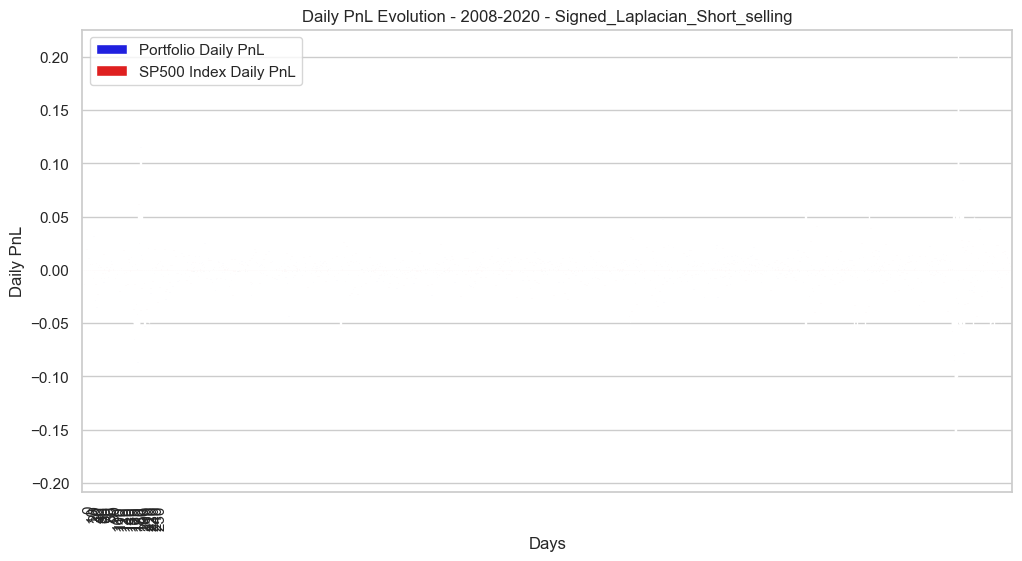

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Création de l'axe des abscisses (nombre de jours)
days = np.arange(1, len(daily_PnL) + 1)

# Configuration de seaborn pour un style agréable
sns.set(style="whitegrid")

# Tracer l'évolution quotidienne de la PnL sous forme de diagramme à barres avec seaborn
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=days, y=daily_PnL, color='blue', width=0.8, label='Portfolio Daily PnL')  # Ajustez la largeur ici
ax = sns.barplot(x=days, y=sp500_PnL, color='red', width=0.8, label='SP500 Index Daily PnL')

# Rotation des étiquettes de l'axe des abscisses de 45 degrés avec un ajustement
ax.set_xticks(np.arange(0,251,10))
ax.set_xticklabels(ax.get_xticks(), rotation=90, ha='right', rotation_mode='anchor')

# Ajouter des titres et des légendes
plt.title(f'Daily PnL Evolution - {year} - {clustering_method}')
plt.xlabel('Days')
plt.ylabel('Daily PnL')
plt.legend()

# Afficher le graphique
plt.show()

# 8. Plot everything (SPONGE vs Signed Laplacian vs SP500)

In [73]:
sp500_PnL.iloc[:-2]

Date
2014-01-02   -0.007520
2014-01-03   -0.000997
2014-01-06   -0.003001
2014-01-07    0.004968
2014-01-08   -0.000222
                ...   
2014-12-22    0.005017
2014-12-23    0.000374
2014-12-24   -0.000742
2014-12-26    0.002422
2014-12-29    0.001593
Name: Daily PnL, Length: 250, dtype: float64

In [92]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

PnL_SPONGE_5 = pd.read_csv('/Users/khelifanail/Documents/GitHub/Portfolio_clustering_project/Outputs/2013-2016/PnL_2013-24_05_2016_SPONGE_5_2.csv')
PnL_SPONGE_1 = pd.read_csv('/Users/khelifanail/Documents/GitHub/Portfolio_clustering_project/Outputs/2018/PnL_2018_SPONGE_1.csv')
PnL_SPONGE_sym_5 = pd.read_csv('/Users/khelifanail/Documents/GitHub/Portfolio_clustering_project/Outputs/2013-2016/PnL_2013-24_05_2016_SPONGE_sym_5_2.csv')
PnL_SL_5 = pd.read_csv('/Users/khelifanail/Documents/GitHub/Portfolio_clustering_project/Outputs/2013-2016/PnL_2013-24_05_2016_signed_laplacian_5_2.csv')

#PnL_SPONGE_5_2 = pd.read_csv('/Users/khelifanail/Documents/GitHub/Portfolio_clustering_project/Outputs/2019/PnL_2019_SPONGE_5_2.csv')
#PnL_SPONGE_sym_5_2 = pd.read_csv('/Users/khelifanail/Documents/GitHub/Portfolio_clustering_project/Outputs/2019/PnL_2019_SPONGE_sym_5_2.csv')
#PnL_SL_5_2 = pd.read_csv('/Users/khelifanail/Documents/GitHub/Portfolio_clustering_project/Outputs/2019/PnL_2019_signed_laplacian_5_2.csv')

# Calculate the cumulative returns
portfolio_cumulative_SL_5 = pd.DataFrame(index=sp500_PnL.index, columns=[f'Signed Laplacian Portfolio Performance in {year}'], data=PnL_SL_5.values)
portfolio_cumulative_SPONGE_5 = pd.DataFrame(index=sp500_PnL.index, columns=[f'SPONGE Portfolio Performance in {year}'], data=PnL_SPONGE_5.values)
portfolio_cumulative_SPONGE_1 = pd.DataFrame(index=sp500_PnL.index, columns=[f'SPONGE Portfolio Performance in {year}'], data=PnL_SPONGE_1.values)
portfolio_cumulative_SPONGE_sym_5 = pd.DataFrame(index=sp500_PnL.index, columns=[f'Symmetric SPONGE Portfolio Performance in {year}'], data=PnL_SPONGE_sym_5.values)

# portfolio_cumulative_SL_5_2 = pd.DataFrame(index=sp500_PnL.iloc[:-1].index, columns=[f'Signed Laplacian Portfolio Performance in {year}'], data=PnL_SL_5_2.values)
# portfolio_cumulative_SPONGE_5_2 = pd.DataFrame(index=sp500_PnL.iloc[:-1].index, columns=[f'SPONGE Portfolio Performance in {year}'], data=PnL_SPONGE_5_2.values)
# portfolio_cumulative_SPONGE_sym_5_2 = pd.DataFrame(index=sp500_PnL.iloc[:-1].index, columns=[f'Symmetric SPONGE Portfolio Performance in {year}'], data=PnL_SPONGE_sym_5_2.values)

# Combine dataframes for seaborn plotting
## combined_df = pd.concat([portfolio_cumulative_SL_5, portfolio_cumulative_SL_5_2, portfolio_cumulative_SPONGE_5, portfolio_cumulative_SPONGE_5_2, portfolio_cumulative_SPONGE_sym_5, portfolio_cumulative_SPONGE_sym_5_2, sp500_PnL.iloc[:-1].cumsum()], axis=1)
combined_df = pd.concat([portfolio_cumulative_SL_5, portfolio_cumulative_SPONGE_5, portfolio_cumulative_SPONGE_sym_5, sp500_PnL.iloc[:-2].cumsum()], axis=1)
combined_df.columns = [f'Signed Laplacian - Evaluation window {evaluation_window}', f'SPONGE - Evaluation window {evaluation_window}', f'SPONGE_sym - Evaluation window {evaluation_window}', f'S&P 500 Index in {year}']

# Set Seaborn style
sns.set(style="darkgrid")

# Plot the relative performance using Seaborn
plt.figure(figsize=(15, 8))
sns.lineplot(data=combined_df, palette=['blue', 'red', 'orange', 'green'], alpha=0.7)
plt.xlabel('Time')
plt.ylabel('Cumulated Profits and Losses')
plt.title(f'Portfolio Relative Performance vs S&P 500 in {year}')
plt.legend()
plt.show()

ValueError: Shape of passed values is (250, 1), indices imply (855, 1)

In [8]:
import numpy as np
import pandas as pd

df = pd.read_csv(r"C:\Users\33640\OneDrive\Documents\GitHub\Portfolio_clustering_project\Outputs\2013-2019\PnL_2013-2019_signed_laplacian_shortselling_eval_window=5_eta=0.02.csv")
PnL=df.squeeze()
def calculate_performance_metrics(PnL_Serie,duree_strat):
    """
    Calculate performance metrics for a series of end-of-day portfolio values.
    
    Parameters:
    PnL_Serie (pd.Series): Series of end-of-day values for the portfolio
    
    Returns:
    dict: Performance metrics including daily returns, volatility, total return, 
          annualized return, Sharpe ratio, and Sortino ratio.
    """
    
    # Ensure the input is a pandas Series
    if not isinstance(PnL_Serie, pd.Series):
        raise TypeError("The end-of-day values input must be a pandas Series.")
    
    # Calculate daily returns
    daily_returns = PnL_Serie.pct_change()
    
    # Calculate the daily mean return and daily volatility
    daily_mean_return = daily_returns.mean()
    daily_volatility = daily_returns.std()
    
    # Calculate total and annualized returns
    total_return = PnL_Serie.iloc[-1]  - 1
    annualized_return = (1 + total_return) ** (252 / duree_strat) - 1
    
    # Calculate annualized daily mean return and volatility
    annualized_daily_mean_return = daily_mean_return * 252
    annualized_volatility = daily_volatility * np.sqrt(252)
    
    # Sharpe ratio (using annualized figures)
    sharpe_ratio = annualized_daily_mean_return / annualized_volatility
    
    # Calculate Sortino ratio
    # First, get the negative returns only
    negative_returns = daily_returns[daily_returns < 0]
    annualized_downside_volatility = negative_returns.std() * np.sqrt(252)
    
    # Sortino ratio uses the same mean return as Sharpe but only the downside volatility
    sortino_ratio = annualized_daily_mean_return / annualized_downside_volatility
    
    # Compile results in a dictionary
    metrics = {
        'Daily Returns': daily_returns,
        'Volatility': daily_volatility,
        'Annualized Volatility': annualized_volatility,
        'Total Return': total_return,
        'Annualized Return': annualized_return,
        'Sharpe Ratio': sharpe_ratio,
        'Sortino Ratio': sortino_ratio
    }
    
    return metrics

calculate_performance_metrics(PnL,duree_strat=1510)

{'Daily Returns': 0            NaN
 1      -0.001755
 2       0.005287
 3       0.006241
 4       0.000465
           ...   
 1505   -0.001555
 1506    0.004631
 1507    0.000060
 1508   -0.001663
 1509    0.009466
 Name: PnL, Length: 1510, dtype: float64,
 'Volatility': 0.002738395564766579,
 'Annualized Volatility': 0.04347068193416782,
 'Total Return': 0.6190617414057038,
 'Annualized Return': 0.08373582509546096,
 'Sharpe Ratio': 1.8534361383977056,
 'Sortino Ratio': 2.5330302196881975}